<center>
<a href="https://exed.polytechnique.edu/fr" ><img src="https://exed.polytechnique.edu/sites/all/themes/college/images/logo.png" style="float:left; max-width: 360px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Scénarios d'Apprentissage Statistique] 

# GRC: Score d'appétence d'un produit bancaire  en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

#### Résumé
Les données sont composées de 825 clients d'une banque décrits par 32 variables concernant leurs avoirs, et utilisations de leurs comptes. Le premier objectif est une exploration du jeu de données, une segmentation ou profilage des types de comportement des clients, le 2ème consiste à estimer puis prévoir un *score d'appétence* pour un produit bancaie, ici la carte visa premier. Comparaison des différentes méthodes et algorihtmes d'apprentissage pour atteindre cet objectif de la régression logistique au *boosting* (*extrem gradient*) en passant par les arbres, les SVM ou random forest. Une procédure de validation croisée généralisée est itérée sur une selection de ces méthodes. Celles d'agrégation de modèles conduisent aux meilleurs résultats. 

## Introduction


### Présentation des données
#### Les variables
La liste des variables est issue d'une base de données retraçant l'historique mensuel bancaire et les caractéristiques de tous les clients. Un sondage a été réalisé afin d'alléger les traitements ainsi qu'une première sélection de variables. Les variables contenues dans le fichier initial sont décrites dans le tableau ci-dessous. Elles sont observées sur 1425 clients.

*Tableau: Liste des variables initiales et de leur libellé* Attention, certains sont écrits en majuscules dans les programmes puis en minuscules après transfomation des données (logarithme, recodage) au cours d ela phase d'exploration. Les noms des variables logarithmes des variables quantitatives se terminent par `L`les variables qualitatives se terminent par `Q`ou `q`. 

**Identifiant** | **Libellé**
           --|--
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`nptag` | Nombre de cartes point argent
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd | Nombre de jours à débit à M
**`carvp`** | **Possession de la carte VISA Premier**

#### Remarque importante: 


<center>
<img src="http://www.cmap.polytechnique.fr/~aymeric.dieuleveut/papers/This-is-ML-pipe" style="float:left; max-width: 600px; display: inline" alt="INSA"/></center>
<br>


Voir par exemple: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_table("vispremv.dat", sep=" ")

In [3]:
df.shape

(1063, 54)

In [4]:
df.head(5)

SEXEQ FAMIQ PCSPQ kvunbq vienbq uemnbq xlgnbq ylvnbq rocnbq nptagq  \
148009  Shom  Fcou  Pint     K1     V1     U2     X2     Y2     R1     N0   
552427  Shom  Fcou  Pint     K0     V0     U1     X0     Y1     R0     N0   
556005  Shom  Fseu  Psan     K0     V0     U2     X1     Y2     R1     N0   
556686  Shom  Fseu  Pouv     K0     V1     U2     X2     Y2     R1     N1   
642680  Shom  Fcou  Pint     K0     V0     U2     X1     Y2     R1     N0   

        ... XLGNB     XLGMTL YLVNB     YLVMTL ROCNB NPTAG     ITAVCL  \
148009  ...     2  13.161865     2  12.110635    14     0  14.080718   
552427  ...     0   0.000000     1   8.132413     0     0  11.717872   
556005  ...     1  10.743178     2  10.309286    14     0  11.329303   
556686  ...     3  12.899220     2  11.203025    11     1  13.111856   
642680  ...     1  10.457976     2   9.190546    27     0  11.304904   

           HAVEFL    JNBJDL CARVP  
148009  13.230263  0.693147  Coui  
552427   0.000000  0.000000  Coui  
556005   0.000000  0.000000  Coui  
556686   9.972267  2.772589  Coui  
642680   0.000000  1.386294  Coui  

[5 rows x 54 columns]

In [5]:
df.columns=df.columns.str.lower() # Mettre en minuscules le nom des variables

In [6]:
df.columns

Index(['sexeq', 'famiq', 'pcspq', 'kvunbq', 'vienbq', 'uemnbq', 'xlgnbq',
       'ylvnbq', 'rocnbq', 'nptagq', 'endetq', 'gagetq', 'facanq', 'lgagtq',
       'havefq', 'jnbjdq', 'ageq', 'relatq', 'qsmoyq', 'opgnbq', 'moyrvq',
       'tavepq', 'dmvtpq', 'boppnq', 'itavcq', 'relat', 'ager', 'opgnbl',
       'moyrvl', 'tavepl', 'endetl', 'gagetl', 'gagecl', 'gageml', 'kvunb',
       'qsmoy', 'qcredl', 'dmvtpl', 'boppnl', 'facanl', 'lgagtl', 'vienb',
       'viemtl', 'uemnb', 'xlgnb', 'xlgmtl', 'ylvnb', 'ylvmtl', 'rocnb',
       'nptag', 'itavcl', 'havefl', 'jnbjdl', 'carvp'],
      dtype='object')

In [7]:
# Description des variables quantitatives
df.describe()

relat         ager       opgnbl       moyrvl       tavepl  \
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000   
mean    132.574788    42.573848     0.627211     2.371296     6.715418   
std      93.499830    11.912343     0.685315     1.464376     4.907295   
min      -2.000000    18.000000     0.000000     0.000000     0.000000   
25%      42.500000    33.000000     0.000000     1.386294     0.000000   
50%     130.000000    43.000000     0.693147     2.564949     8.652248   
75%     204.500000    52.000000     1.098612     3.349750    10.962298   
max     393.000000    65.000000     3.367296     7.451242    13.785052   

            endetl       gagetl       gagecl       gageml        kvunb  ...  \
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000  ...   
mean      0.827903     4.477338     1.868891     2.394713     1.028222  ...   
std       1.279475     5.473534     3.680483     4.540024     0.501554  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     1.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     1.000000  ...   
75%       1.945910    10.483833     0.000000     0.000000     1.000000  ...   
max       4.605170    15.060512    13.123924    14.296852     4.000000  ...   

             uemnb        xlgnb       xlgmtl        ylvnb       ylvmtl  \
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000   
mean      1.468485     0.649106     4.161701     0.760113     4.726685   
std       1.280262     0.794352     5.205502     0.782235     4.662683   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     1.000000     4.882802   
75%       2.000000     1.000000    10.033572     1.000000     9.651494   
max       9.000000     4.000000    13.270100     4.000000    13.785052   

             rocnb        nptag       itavcl       havefl       jnbjdl  
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000  
mean      8.564440     0.136406     9.373976     3.043170     1.189791  
std      11.738092     0.379837     3.313518     4.665580     1.587594  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     8.067305     0.000000     0.000000  
50%       2.000000     0.000000    10.075969     0.000000     0.000000  
75%      14.000000     0.000000    11.649131     6.216606     2.441401  
max      69.000000     4.000000    16.045468    15.770893     4.905275  

[8 rows x 28 columns]

In [8]:
df.isnull().sum() # Vérification si présence de valeurs manquantes 

sexeq     0
famiq     0
pcspq     0
kvunbq    0
vienbq    0
uemnbq    0
xlgnbq    0
ylvnbq    0
rocnbq    0
nptagq    0
endetq    0
gagetq    0
facanq    0
lgagtq    0
havefq    0
jnbjdq    0
ageq      0
relatq    0
qsmoyq    0
opgnbq    0
moyrvq    0
tavepq    0
dmvtpq    0
boppnq    0
itavcq    0
relat     0
ager      0
opgnbl    0
moyrvl    0
tavepl    0
endetl    0
gagetl    0
gagecl    0
gageml    0
kvunb     0
qsmoy     0
qcredl    0
dmvtpl    0
boppnl    0
facanl    0
lgagtl    0
vienb     0
viemtl    0
uemnb     0
xlgnb     0
xlgmtl    0
ylvnb     0
ylvmtl    0
rocnb     0
nptag     0
itavcl    0
havefl    0
jnbjdl    0
carvp     0
dtype: int64

In [70]:
df.carvp.value_counts()

Cnon    706
Coui    357
Name: carvp, dtype: int64

In [33]:
# Sélection des variables numériques
df_Num = df.select_dtypes(exclude=['object'])
df_Num.shape
df_Num.columns

Index(['relat', 'ager', 'opgnbl', 'moyrvl', 'tavepl', 'endetl', 'gagetl',
       'gagecl', 'gageml', 'kvunb', 'qsmoy', 'qcredl', 'dmvtpl', 'boppnl',
       'facanl', 'lgagtl', 'vienb', 'viemtl', 'uemnb', 'xlgnb', 'xlgmtl',
       'ylvnb', 'ylvmtl', 'rocnb', 'nptag', 'itavcl', 'havefl', 'jnbjdl'],
      dtype='object')

In [34]:
X=df.drop(columns='carvp') # Données d'entrée

# Recodage de la variable à expliquer
y=df["carvp"].map(lambda x: 0 if x=="Cnon" else 1)

In [ ]:
# Liste des variables numériques
var_num=list(df.select_dtypes(exclude='object').columns)
var_num

In [35]:
# Extraction des échantillons apprentissage et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

preprocessor = make_column_transformer(
    (OneHotEncoder(), ["sexeq"]),
    (OneHotEncoder(), ["famiq"]),
    (OneHotEncoder(), ["pcspq"]),
    (StandardScaler(),var_num))

In [56]:
# Test avec une Régression Logistique

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

pipeline_LR = make_pipeline(preprocessor, LogisticRegression())
pipeline_LR.steps

LR = pipeline_LR.fit(X_train, y_train)

print("Accuracy:",metrics.accuracy_score(y_test, pipeline_LR.predict(X_test)))  

Accuracy: 0.8544600938967136


In [57]:
y_pred=pipeline_LR.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[125,  16],
       [ 15,  57]], dtype=int64)

In [58]:
pipeline_LR.score(X_train,y_train) 

0.8635294117647059

In [60]:
# Test avec Gradient BOOSTING

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import metrics

pipeline_GB = make_pipeline(preprocessor, GradientBoostingClassifier())
pipeline_GB.steps
paramGrid = [
  {'gradientboostingclassifier__n_estimators': list(range(100,301,50)), 'gradientboostingclassifier__learning_rate': [0.1,0.2,0.3,0.4]}
 ] 
pipeline_GB_CV = GridSearchCV(pipeline_GB, paramGrid, cv=5) 
GB = pipeline_GB_CV.fit(X_train, y_train)

In [61]:
print("Meilleur score = %f, Meilleur paramètre = %s" % (pipeline_GB_CV.best_score_,pipeline_GB_CV.best_params_))

print("Accuracy:",metrics.accuracy_score(y_test, pipeline_GB_CV.predict(X_test)))  

Meilleur score = 0.917647, Meilleur paramètre = {'gradientboostingclassifier__learning_rate': 0.4, 'gradientboostingclassifier__n_estimators': 150}
Accuracy: 0.892018779342723


In [66]:
# Test avec Random Forest

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

pipeline_RF = make_pipeline(preprocessor, RandomForestClassifier())
pipeline_RF.steps

param=[{"randomforestclassifier__max_features":list(range(2,10,1))}]
pipeline_RF_CV = GridSearchCV(pipeline_RF, param, cv=5)

RF = pipeline_RF_CV.fit(X_train, y_train)  

In [64]:
print("Meilleur score = %f, Meilleur paramètre = %s" % (pipeline_RF_CV.best_score_,pipeline_RF_CV.best_params_))

print("Accuracy:",metrics.accuracy_score(y_test, pipeline_RF_CV.predict(X_test)))  

Meilleur score = 0.898824, Meilleur paramètre = {'randomforestclassifier__max_features': 8}
Accuracy: 0.8826291079812206


In [ ]:
y_pred=XGB.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))  

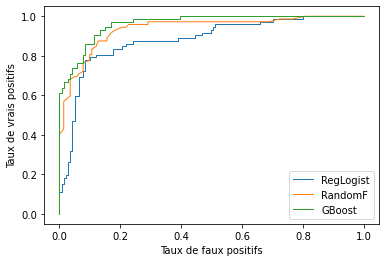

In [69]:
# Courbes de ROC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

listMethod=[["RegLogist",LR],["RandomF",RF],["GBoost",GB],["XGBoost",XGB]]

for method in enumerate(listMethod):
    probas_ = method[1][1].predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:,1])
    plt.plot(fpr, tpr, lw=1,label="%s"%method[1][0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="best")
plt.show() 